In [1]:
from manim import *
import numpy as np
import os

RAY_START = np.array([-2, 0, 3])
RAY_END = np.array([2, 0, 3])
RAY_MIDDLE = RAY_START / 2
LENGTH = 1
BACKGROUND_COLOR = WHITE
TEXT_COLOR = BLACK
E_COLOR = BLUE
E_COMPONENT_COLOR = BLUE_A
B_COLOR = RED
B_COMPONENT_COLOR = RED_A
PLANE_COLOR = "#c91d02"
INCIDENT_PLANE_COLOR = "#075209"
config.background_color = BACKGROUND_COLOR


Manim Community v0.17.3

In [10]:
class Polarized(ThreeDScene):
    def construct(self):
        self.draw_axes()
        self.set_up()

    def set_up(self):
        plane = Square(
            color=BACKGROUND_COLOR,
            fill_opacity=0.3,
            fill_color=PLANE_COLOR,
            side_length=6,
        )
        plane_label = (
            Text(r"Plasma Surface", color=PLANE_COLOR)
            .move_to(plane.get_center() + 1 * RIGHT + 1 * DOWN)
            .scale(0.4)
            .rotate(0.3, RIGHT)
        )
        normal = Arrow(end=3 * OUT, start=plane.get_center(), color=BLACK, z_index=1)
        normal_label = (
            Text(r"Normal", color=TEXT_COLOR)
            .move_to(normal.get_center() + 1 * OUT + 0.5 * RIGHT)
            .scale(0.3)
            .rotate(PI / 2 - 0.2, RIGHT)
        )

        ray_out = Arrow(
            end=RAY_END,
            start=ORIGIN,
            color=GREEN,
            buff=0,
        )
        ray_in = Arrow(
            end=ORIGIN,
            start=RAY_START,
            color=GREEN,
            buff=0,
        )
        plane_of_incident = Rectangle(
            color=BACKGROUND_COLOR,
            fill_opacity=0.3,
            fill_color=INCIDENT_PLANE_COLOR,
            width=5,
            height=6,
        )
        plane_of_incident.rotate(PI / 2, axis=RIGHT)
        plane_of_incident.move_to(plane.center())
        poi_label = (
            Text("Plane of Incident", color=INCIDENT_PLANE_COLOR)
            .move_to(1 * OUT + 1 * RIGHT)
            .scale(0.4)
            .rotate(PI / 2 - 0.2, RIGHT)
        )

        self.plane_light = VGroup(
            plane,
            plane_of_incident,
            normal,
            ray_in,
            ray_out,
            plane_label,
            normal_label,
            poi_label,
        )

        self.add(self.plane_light)

    def draw_axes(self):
        ax = ThreeDAxes(
            x_range=[-5, 5],
            y_range=[-5, 5],
            z_range=[-5, 5],
            x_length=10,
            y_length=10,
            z_length=7,
            axis_config={
                "include_tip": True,
                "color": TEXT_COLOR,
            },
        )
        self.add(ax)
        # set axes labels
        lab_x = (
            MathTex(r"x", color=TEXT_COLOR)
            .next_to(ax.x_axis.get_end(), RIGHT)
            .rotate(PI / 2, axis=-LEFT)
        )
        lab_z = (
            MathTex(r"z", color=TEXT_COLOR)
            .next_to(ax.y_axis.get_end(), UP)
            .rotate(PI / 2, axis=RIGHT)
        )
        lab_y = (
            MathTex(r"y", color=TEXT_COLOR)
            .next_to(ax.z_axis.get_end(), OUT)
            .rotate(PI / 2, axis=-LEFT)
        )
        self.add(lab_y, lab_z, lab_x)
        self.ax = ax

    def draw_arrow(self, a, b, c, length=1, direction="x", field="E"):
        l = length / 2
        arrow_group = VGroup()
        start_pos = np.array([a, b, c])
        if direction == "x":
            end_pos = np.array([a + l, b, c])
        elif direction == "z":
            end_pos = np.array([a, b + l, c])
        elif direction == "y":
            end_pos = np.array([a, b, c + l])
        else:
            print("Error in draw_arrow")

        if field == "E":
            arrow = Arrow(
                start=start_pos,
                end=end_pos,
                color=E_COMPONENT_COLOR,
                stroke_width=6,
                buff=0,
            )
            # add E_direction as label
            field = r"\vec{E_"
            field += direction
            field += "}"
            label = (
                MathTex(field, color=TEXT_COLOR)
                .move_to(arrow.get_end() * 1.1 + 0.2 * LEFT)
                .scale(0.8)
                .rotate(PI / 2, RIGHT)
            )
            arrow_group.add(arrow, label)
        elif field == "B":
            arrow = Arrow(
                start=start_pos,
                end=end_pos,
                color=B_COMPONENT_COLOR,
                stroke_width=6,
                buff=0,
            )
            # add B_direction as label
            field = r"\vec{B_"
            field += direction
            field += "}"
            label = (
                MathTex(field, color=TEXT_COLOR)
                .move_to(arrow.get_end() * 1.1 + 0.2 * LEFT)
                .scale(0.8)
                .rotate(PI / 2, RIGHT)
            )
            arrow_group.add(arrow, label)
        return arrow_group

    def p_light(self):
        ray_in = self.plane_light[3]
        ray_in_direction = ray_in.get_end() - ray_in.get_start()
        per_ray_in_left = np.cross(ray_in_direction, LEFT)
        per_ray_in_left = per_ray_in_left / np.linalg.norm(per_ray_in_left)
        per_ray_in_up = np.cross(ray_in_direction, DOWN)
        per_ray_in_up = per_ray_in_up / np.linalg.norm(per_ray_in_up)

        left = Arrow(
            # end=-per_ray_in_left * LENGTH + RAY_MIDDLE, #Out of page
            end=per_ray_in_left * LENGTH + RAY_MIDDLE, #Into the page
            start=RAY_MIDDLE,
            color=B_COLOR,
            buff=0,
        )
        up = Arrow(
            end=per_ray_in_up * LENGTH + RAY_MIDDLE,
            start=RAY_MIDDLE,
            color=E_COLOR,
            buff=0,
        )
        left_label = (
            MathTex(r"\vec{B}", color=TEXT_COLOR)
            .move_to(left.get_end() * 1.1)
            .scale(0.7)
            .rotate(PI / 2, RIGHT)
        )
        up_label = (
            MathTex(r"\vec{E}", color=TEXT_COLOR)
            .move_to(up.get_end() * 1.1)
            .scale(0.7)
            .rotate(PI / 2, RIGHT)
        )
        self.add(left, up, left_label, up_label)

    def s_light(self):
        ray_in = self.plane_light[3]
        ray_in_direction = ray_in.get_end() - ray_in.get_start()
        per_ray_in_left = np.cross(ray_in_direction, RIGHT)
        per_ray_in_left = per_ray_in_left / np.linalg.norm(per_ray_in_left)
        per_ray_in_up = np.cross(ray_in_direction, DOWN)
        per_ray_in_up = per_ray_in_up / np.linalg.norm(per_ray_in_up)

        left = Arrow(
            # end=-per_ray_in_left * LENGTH + RAY_MIDDLE, #Out of page
            end=per_ray_in_left * LENGTH + RAY_MIDDLE, #Into the page
            start=RAY_MIDDLE,
            color=E_COLOR,
            buff=0,
        )
        up = Arrow(
            end=per_ray_in_up * LENGTH + RAY_MIDDLE,
            start=RAY_MIDDLE,
            color=B_COLOR,
            buff=0,
        )
        left_label = (
            MathTex(r"\vec{E}", color=TEXT_COLOR)
            .move_to(left.get_end() * 1.1 + 0.2 * RIGHT)
            .scale(0.7)
            .rotate(PI / 2, RIGHT)
        )
        up_label = (
            MathTex(r"\vec{B}", color=TEXT_COLOR)
            .move_to(up.get_end() * 1.1)
            .scale(0.7)
            .rotate(PI / 2, RIGHT)
        )
        self.add(left, up, left_label, up_label)


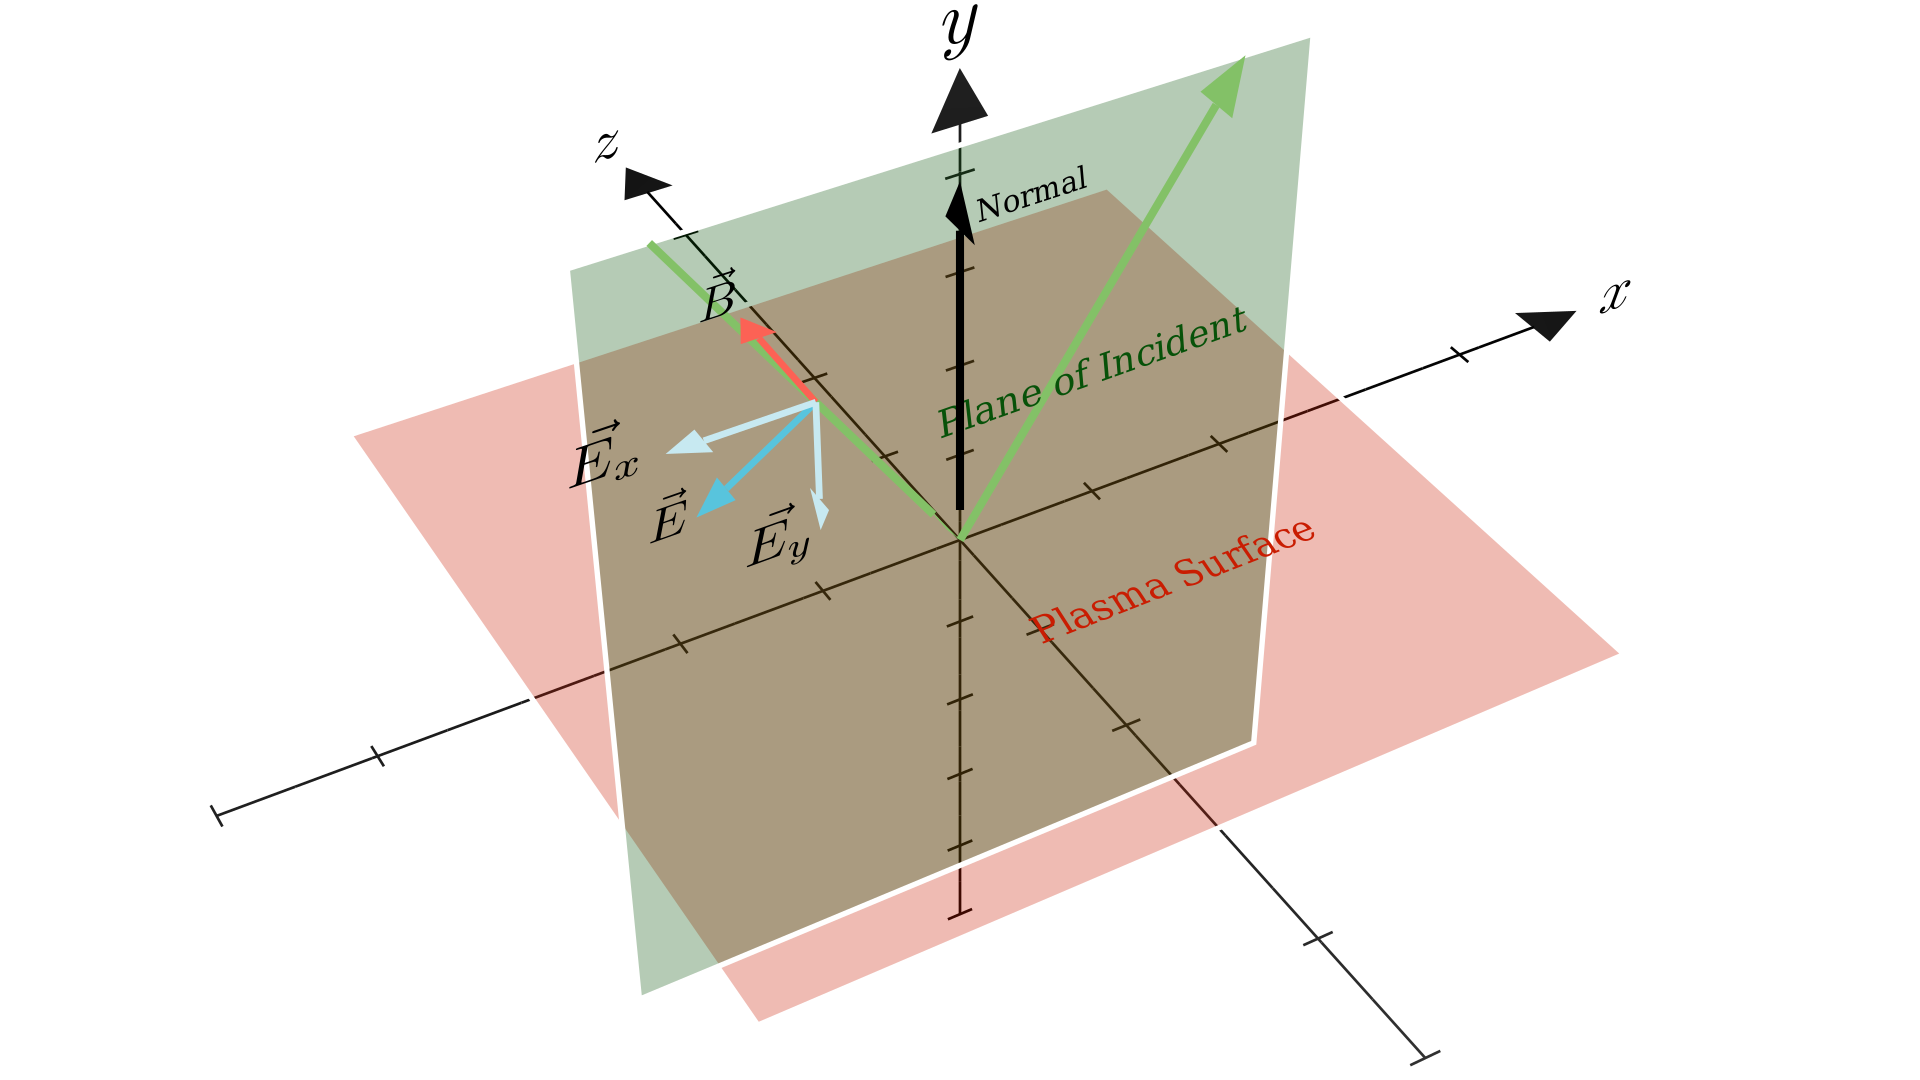

In [11]:
%%manim -v WARNING  --progress_bar None -s -qh --disable_caching PPolarized
class PPolarized(Polarized):
    def construct(self):
        super().construct()
        self.p_light()
        self.add(self.draw_arrow(*RAY_MIDDLE, direction="y", field="E", length=-2))
        self.add(self.draw_arrow(*RAY_MIDDLE, direction="x", field="E", length=-2))
        # self.set_camera_orientation(phi=85 * DEGREES, theta=-45 * DEGREES)
        # self.set_camera_orientation(phi=65 * DEGREES, theta=-30 * DEGREES)  # OpenGL
        self.set_camera_orientation(phi=50 * DEGREES, theta=-120 * DEGREES)  # Cairo
        self.camera.set_zoom(1.15)
        # self.interactive_embed()


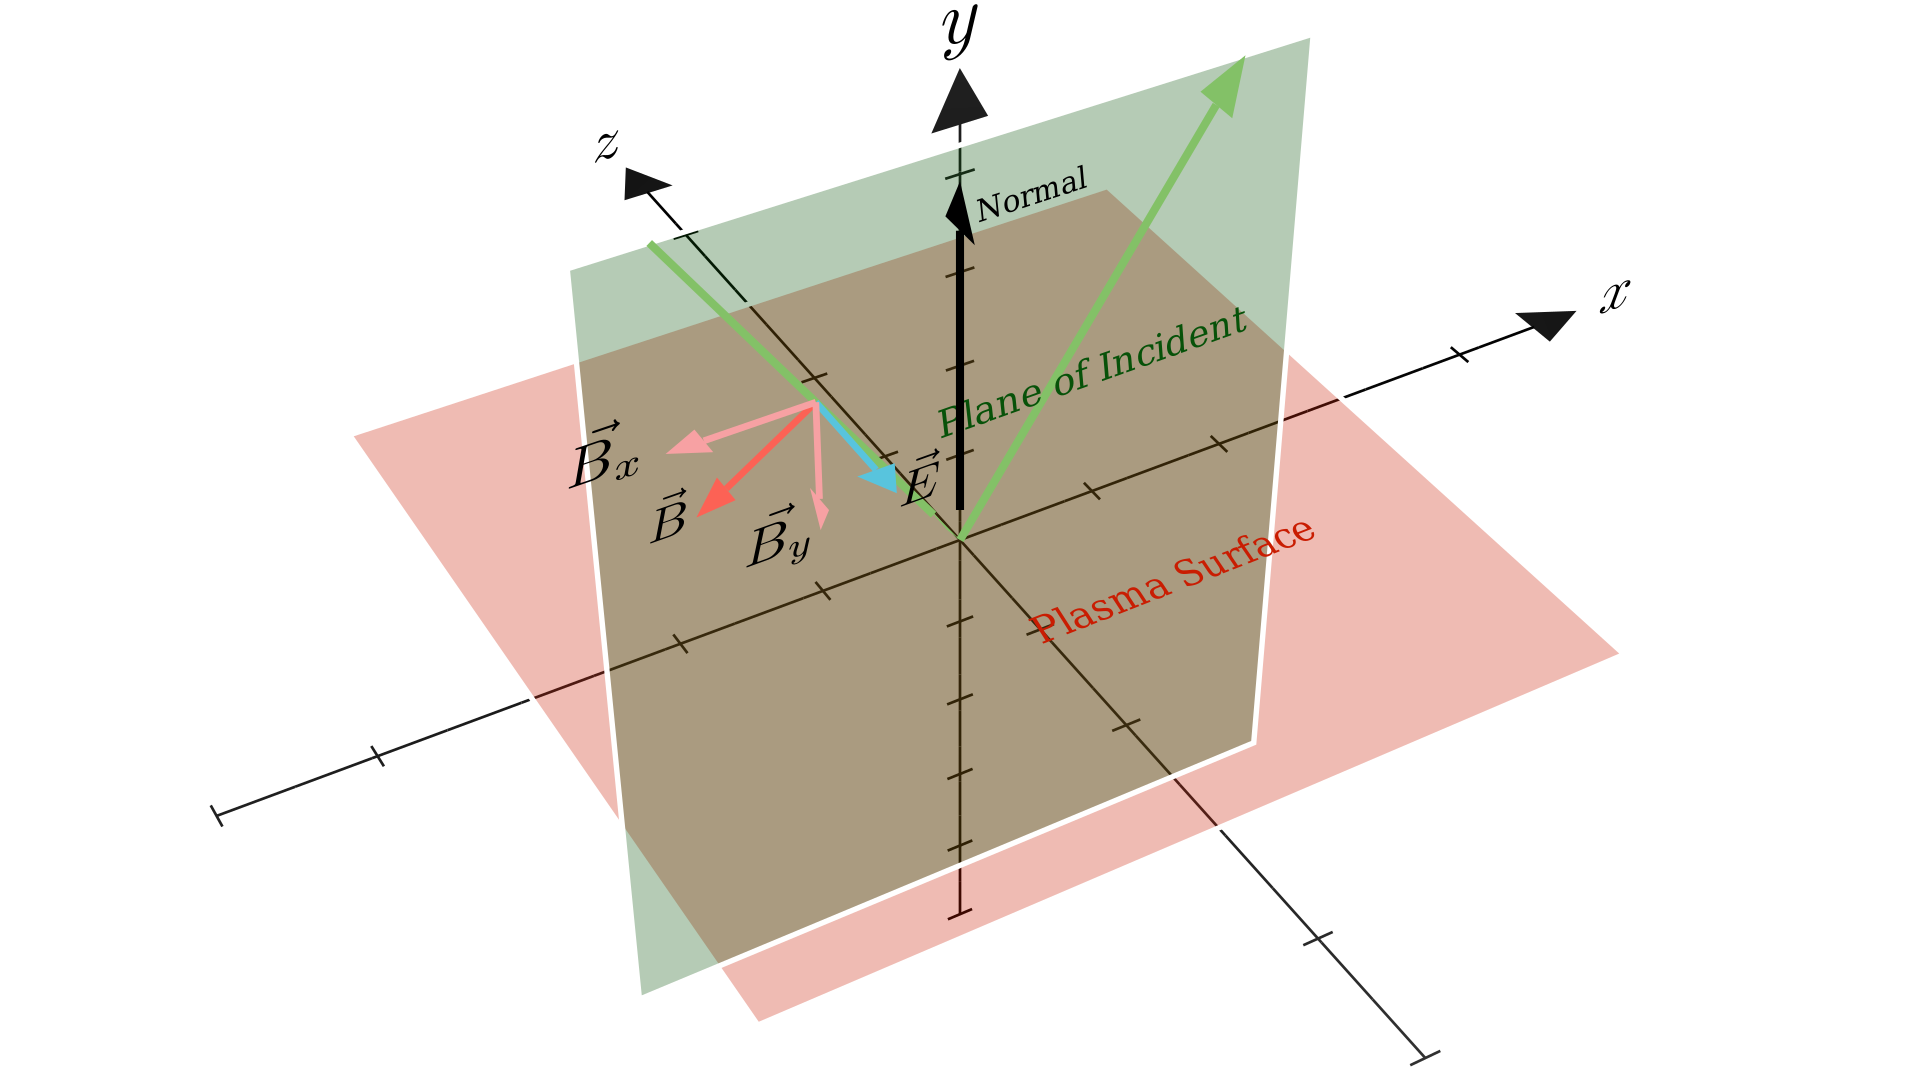

In [12]:
%%manim -v WARNING  --progress_bar None -s -qh --disable_caching SPolarized
class SPolarized(Polarized):
    def construct(self):
        super().construct()
        self.s_light()
        self.add(self.draw_arrow(*RAY_MIDDLE, direction="y", field="B", length=-2))
        self.add(self.draw_arrow(*RAY_MIDDLE, direction="x", field="B", length=-2))
        # self.set_camera_orientation(phi=65 * DEGREES, theta=-30 * DEGREES)  # OpenGL
        self.set_camera_orientation(phi=50 * DEGREES, theta=-120 * DEGREES)  # Cairo
        self.camera.set_zoom(1.15)
        # self.interactive_embed()
